# Projeto de aplicação

Disciplina: Inteligencia Artificial e Tecnologia na Medicina
Professores: Claudio Tinoco/Erito Marques/Flavio Seixas

Alunos:

Giovane Leal de Azevedo Junior

Jenaine Rosa Godinho Emiliano

# Motivação

O Diabetes Mellitus é uma condição crônica que afeta milhões de pessoas em todo o mundo. O crescimento acentuado da prevalência nas últimas décadas se apresenta como um grave problema de saúde pública. Com o crescente volume de dados de saúde disponíveis, há uma oportunidade de usar modelos de inteligência artificial para melhorar a detecção precoce, o diagnóstico e o gerenciamento de diabetes. A aplicação de técnicas de aprendizado de máquina pode fornecer insights valiosos que auxiliam profissionais de saúde na tomada de decisões e no tratamento dos pacientes.

# Objetivo
Desenvolver um modelo de aprendizado supervisionado que possa prever a presença de diabetes em indivíduos com base em um conjunto de indicadores de saúde. Usaremos o dataset CDC Diabetes Health Indicators para treinar e testar o modelo, visando obter um classificador eficaz que possa diferenciar entre indivíduos com e sem diabetes.

# Descrição do dataset
O conjunto de dados CDC Diabetes Health Indicators contém informações de 253.680 indivíduos, com 21 características relacionadas à saúde e estilo de vida, como idade, IMC, pressão arterial, histórico de tabagismo, e outros. As variáveis de saída são categóricas, indicando se o indivíduo é saudável, pré-diabético ou diabético.

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


In [1]:
# Desenvolver o código aqui.
#pip install ucimlrepo 

from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn import tree
import graphviz 

import os
import pandas as pd
import numpy as np

from functions import *


# Preparação dos dados
    - limpeza de dados.
    - validação de dados.
    - revisão de formato.
	- verificação de dados faltantes.
	- one hot encoding.
	- ajuste de escala.

In [2]:
# Desenvolver o código aqui.
# Baixa o dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# Coloca os dados em pandas dataframe
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets

#Informações dos valores do dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [3]:
#Estatísticas dos dados
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [5]:
# Varificando dados faltantes
missing_values = X.isnull().sum()
missing_values

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Nenhum dado faltante foi encontrado

In [6]:
#Proporção entra as classes
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64

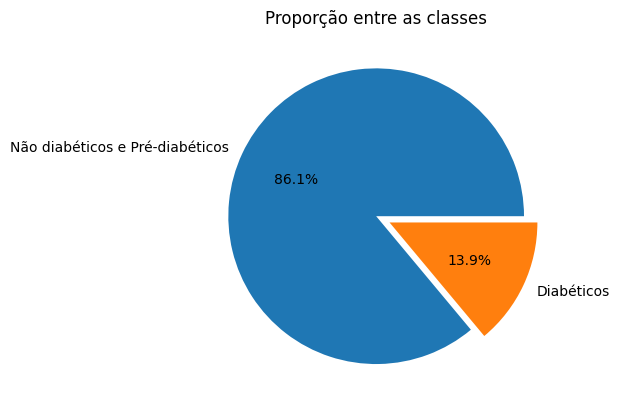

In [7]:
#Visualização da proporção entre diabéticos e não diabéticos
fig, ax = plt.subplots()
ax.pie(y.value_counts(),
       labels=['Não diabéticos e Pré-diabéticos','Diabéticos'],
       autopct='%1.1f%%',
       explode = (0, 0.1))
ax.set_title('Proporção entre as classes')
plt.show()


O dataset está desbalanceado. Como o dataset utilizado é muito grande, optou-se por balancear as classes selecionando uma amostra aleatória dentre os pacientes Não Diabéticos de modo a ficar na mesma proporção. Com isso, será possível treinar os modelos com os recursos computacionais disponíveis.

In [8]:
#Balanceamento.
#Juntar o X e y para fazer o balanceamento
dataset = X.join(y)

#Separa as linhas que contem 0 (Não diabéticos e pré) e 1 (Diabéticos)
nao_diab = dataset[dataset['Diabetes_binary'] == 0]
diabeticos = dataset[dataset['Diabetes_binary'] == 1]

#Seleciona aleatoriamente o mesmo número de não diabéticos para compor essa classe
np.random.seed(42)
nao_diab_random = nao_diab.take(np.random.permutation(len(nao_diab))[:len(diabeticos)])

#Junta os datasets e ajusta o indice
dataset_b = pd.concat([diabeticos,nao_diab_random])
dataset_b = dataset_b.sort_index()
dataset_b = dataset_b.reset_index()

#Obtem o dataset com classes balanceadas
X_b = dataset_b.drop('Diabetes_binary',axis=1)
y_b = dataset_b['Diabetes_binary']

In [15]:
#Proporção entra as classes
y_b.value_counts()

Diabetes_binary
0    35346
1    35346
Name: count, dtype: int64

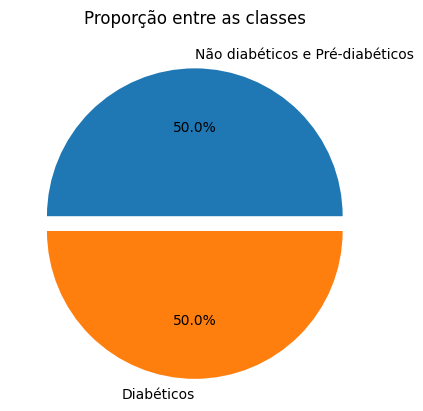

In [9]:
#Visualização da proporção entre diabéticos e não diabéticos no dataset balanceado
fig, ax = plt.subplots()
ax.pie(y_b.value_counts(),
       labels=['Não diabéticos e Pré-diabéticos','Diabéticos'],
       autopct='%1.1f%%',
       explode = (0, 0.1))
ax.set_title('Proporção entre as classes')
plt.show()

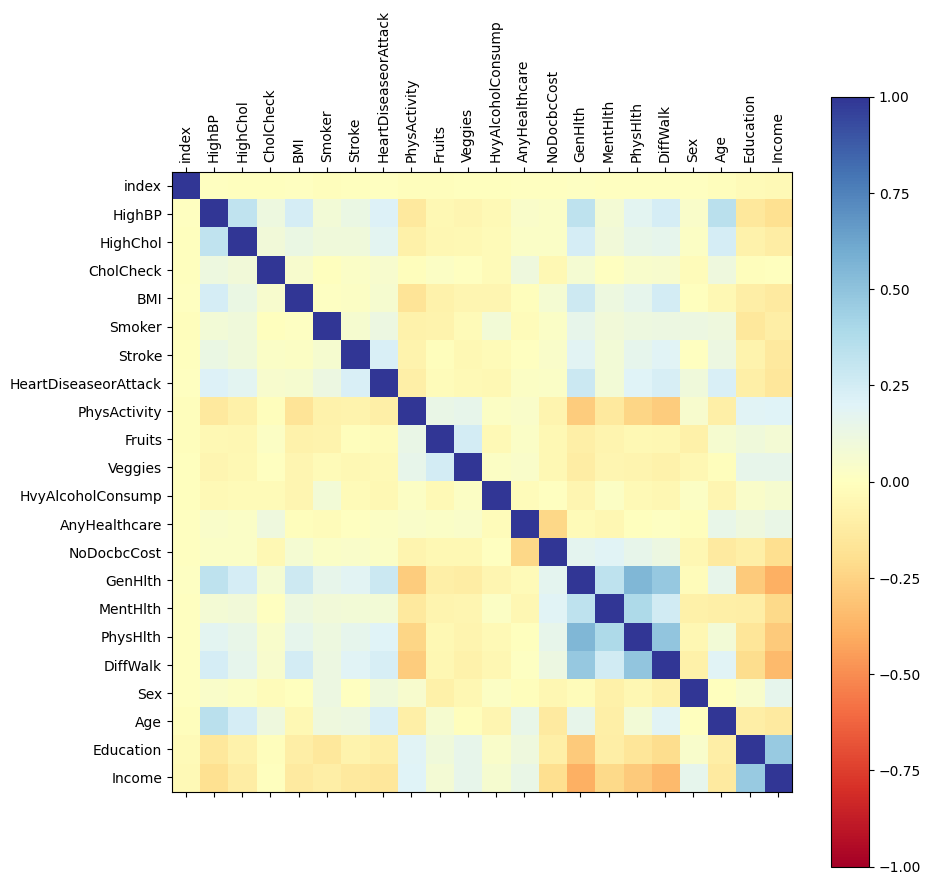

In [10]:
# Display a correlation matrix
correlationMatrix(X_b)

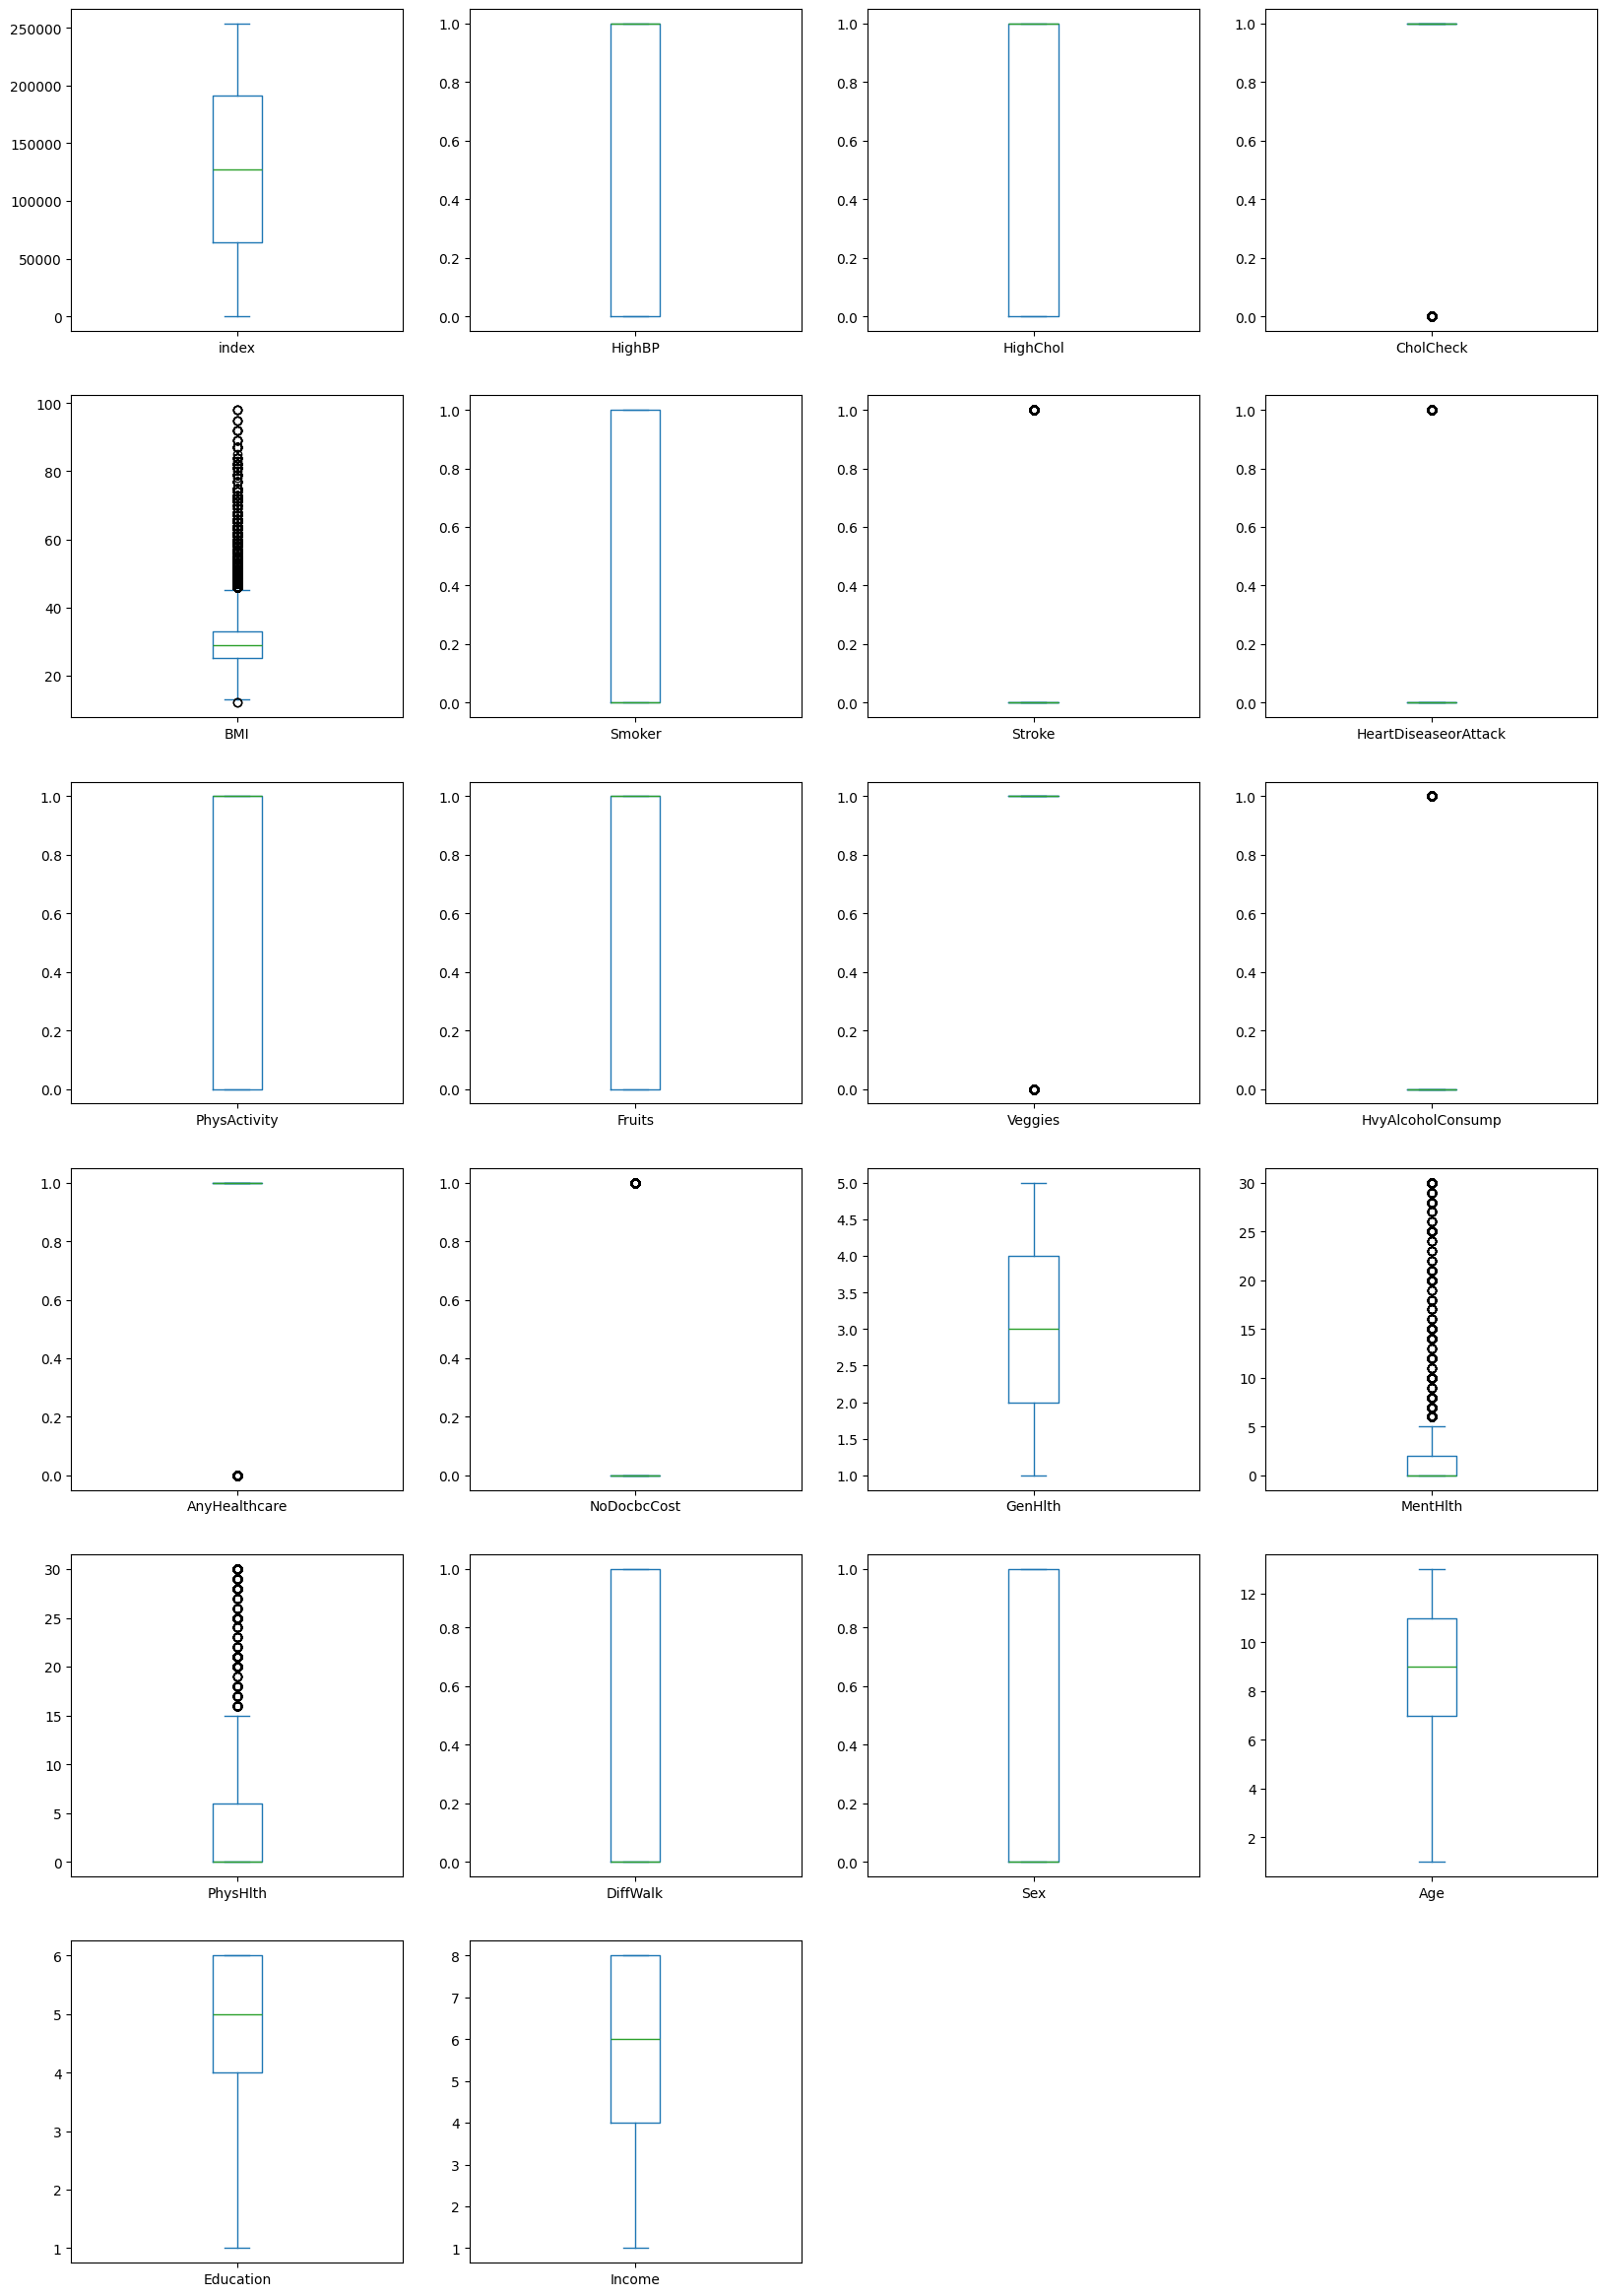

In [11]:
# Display boxplots for each numeric feature
boxPlotAll(X_b)

#One hot Encoding

GenHlth - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

Age - 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Education - Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

Income - Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more



In [15]:
categorical_cols = ['GenHlth', 'Age', 'Education', 'Income'] 
X_b_e = pd.get_dummies(X_b,columns = categorical_cols,dtype=int)

In [16]:
X_b_e

,index,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,4,1,1,1,24,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
1,6,1,0,1,30,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,8,1,1,1,30,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,10,0,0,1,25,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
4,13,1,1,1,28,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,253668,0,1,1,29,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
70688,253670,1,1,1,25,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
70689,253674,0,0,1,27,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
70690,253676,1,1,1,18,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
#Colunas após o one hot encoding
X_b_e.columns

Index(['index', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'GenHlth_1', 'GenHlth_2', 'GenHlth_3',
       'GenHlth_4', 'GenHlth_5', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
       'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10', 'Age_11', 'Age_12',
       'Age_13', 'Education_1', 'Education_2', 'Education_3', 'Education_4',
       'Education_5', 'Education_6', 'Income_1', 'Income_2', 'Income_3',
       'Income_4', 'Income_5', 'Income_6', 'Income_7', 'Income_8'],
      dtype='object')

Colunas para a normalização

- BMI - Body Mass Index
- MentHlth - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
- PhysHlth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days




In [24]:
# Normalização dos dados na faixa de 0 e 1
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X_b_e)
X_b_e_r = pd.DataFrame(rescaledX, columns=X_b_e.columns)
X_b_e_r

,index,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0.000000,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000008,1.0,0.0,1.0,0.209302,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000016,1.0,1.0,1.0,0.209302,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000024,0.0,0.0,1.0,0.151163,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000035,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.999957,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,0.999965,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
70689,0.999980,0.0,0.0,1.0,0.174419,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
70690,0.999988,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
X_b_e_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  MentHlth              70692 non-null  float64
 15  PhysHlth           

# Treinamento do modelo de aprendizado de máquina
- Seleção do(s) modelo(s) supervisionado(s).
- Grid com os hiperparâmetros.
- Amostras usadas para treinamento, validação e teste, e método de validação usado.
- Medidas de desempenho usadas para otimização.

In [26]:
# Dividir os dados em conjuntos de treinamento e teste (por exemplo, 80% para treinamento e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X_b_e_r, y_b, test_size=0.2, random_state=42)
# Transformar y_train e y_test em vetores unidimensionais
y_b = y_b.values.ravel()
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [27]:
# Desenvolver o código aqui.
# Defina os modelos que você deseja testar
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Defina os parâmetros que você deseja ajustar para cada modelo
parameters = {
    'Decision Tree': {'max_depth': [None, 2, 3, 4, 5, 8, 16, 32]},
    'Random Forest': {'n_estimators': [100, 200, 400, 800]},
    'KNN': {'n_neighbors': [5, 7, 11]},
    'SVM': {'C': [0.1, 1], 'gamma': [0.1, 0.01]}
}

In [28]:
#Variáveis para guardar o melhor modelo baseado na acurácia
best_model = None
best_score = 0

# Iterar sobre os modelos e parâmetros para encontrar o melhor modelo
for model_name, model in models.items():
    clf = GridSearchCV(model, parameters[model_name], cv=5)
    clf.fit(X_train, y_train)
    score = clf.best_score_
    print(f"{model_name}: {score}")

    if score > best_score:
        best_model = clf.best_estimator_
        best_score = score

# O melhor modelo e seus parâmetros
print("Melhor modelo:", best_model)

Decision Tree: 0.7288914408569672
Random Forest: 0.7397485339537477
KNN: 0.7134192742587379
SVM: 0.741870429488098
Melhor modelo: SVC(C=1, gamma=0.01)


# Avaliação
- Matriz confusão.
- Medidas de desempenho usadas para o teste.
- Visualização (Curva ROC)

In [29]:
# Faça previsões nos dados de teste
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      7002
           1       0.73      0.81      0.77      7137

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



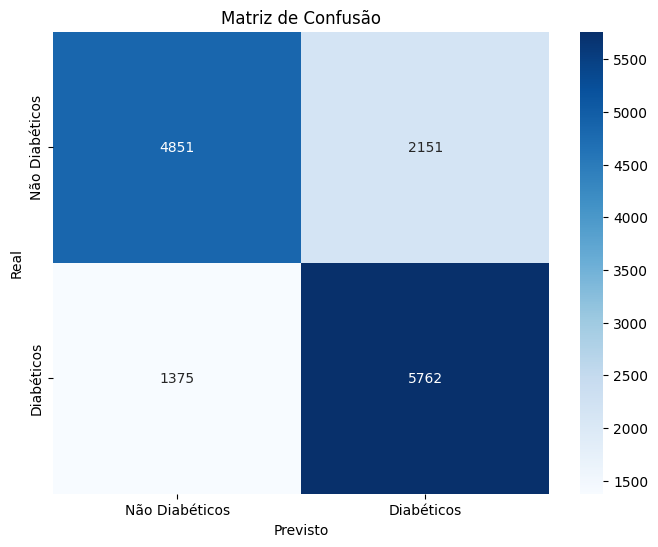

In [30]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels = [0, 1])

# Crie um heatmap da matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Diabéticos', 'Diabéticos'], 
            yticklabels=['Não Diabéticos', 'Diabéticos'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

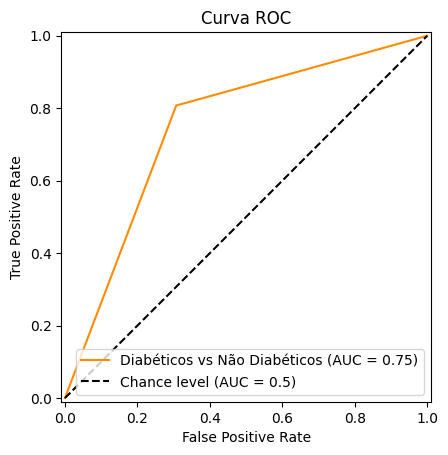

In [31]:
display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred,
    name='Diabéticos vs Não Diabéticos',
    color='darkorange',
    plot_chance_level=True,
    drop_intermediate=True
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC",
)

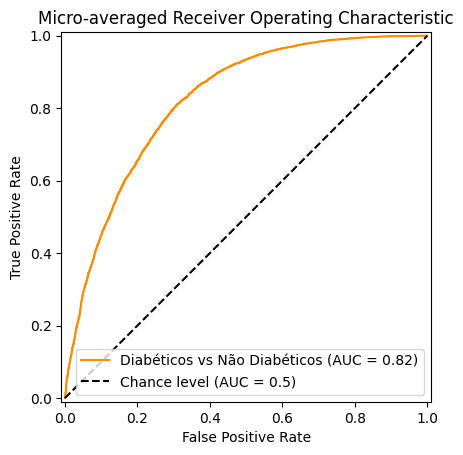

In [32]:
display = RocCurveDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    name='Diabéticos vs Não Diabéticos',
    color='darkorange',
    plot_chance_level=True
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged Receiver Operating Characteristic",
)

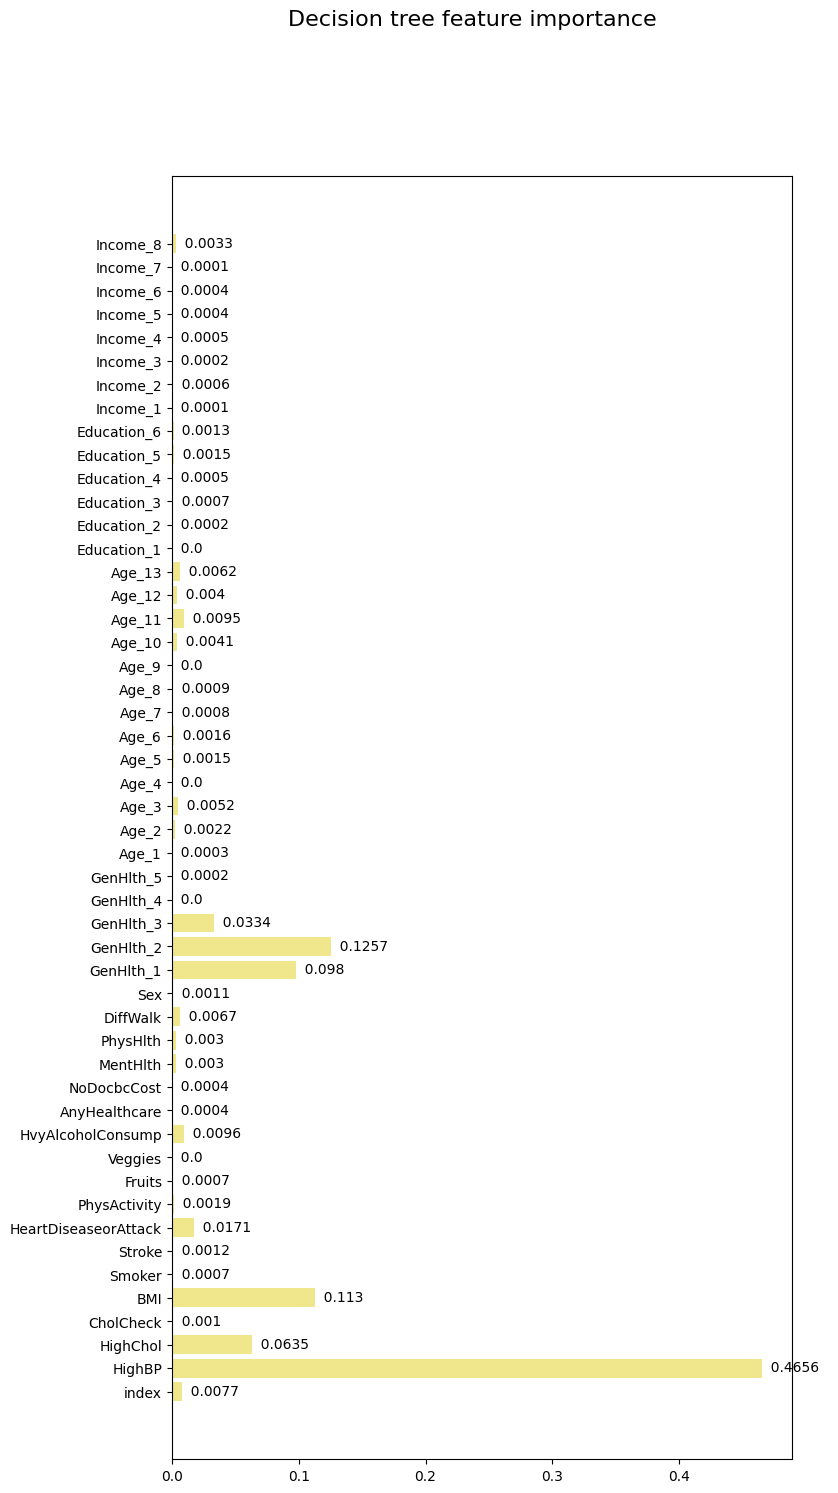

In [33]:
#Avaliação das variáveis de maior relevância no modelo de árvore de decisão
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
decisionTreeSummary(dt,X_test.columns)

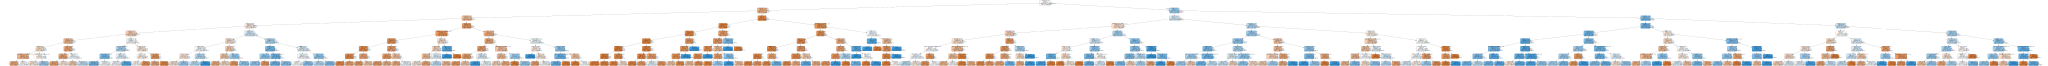

In [34]:
dot_data = tree.export_graphviz(dt, out_file=None,
            feature_names=X_test.columns,
            class_names=['Diabéticos','Não diabéticos'],
            filled=True, rounded=True,
            special_characters=True)
graph = graphviz.Source(dot_data) 
graph


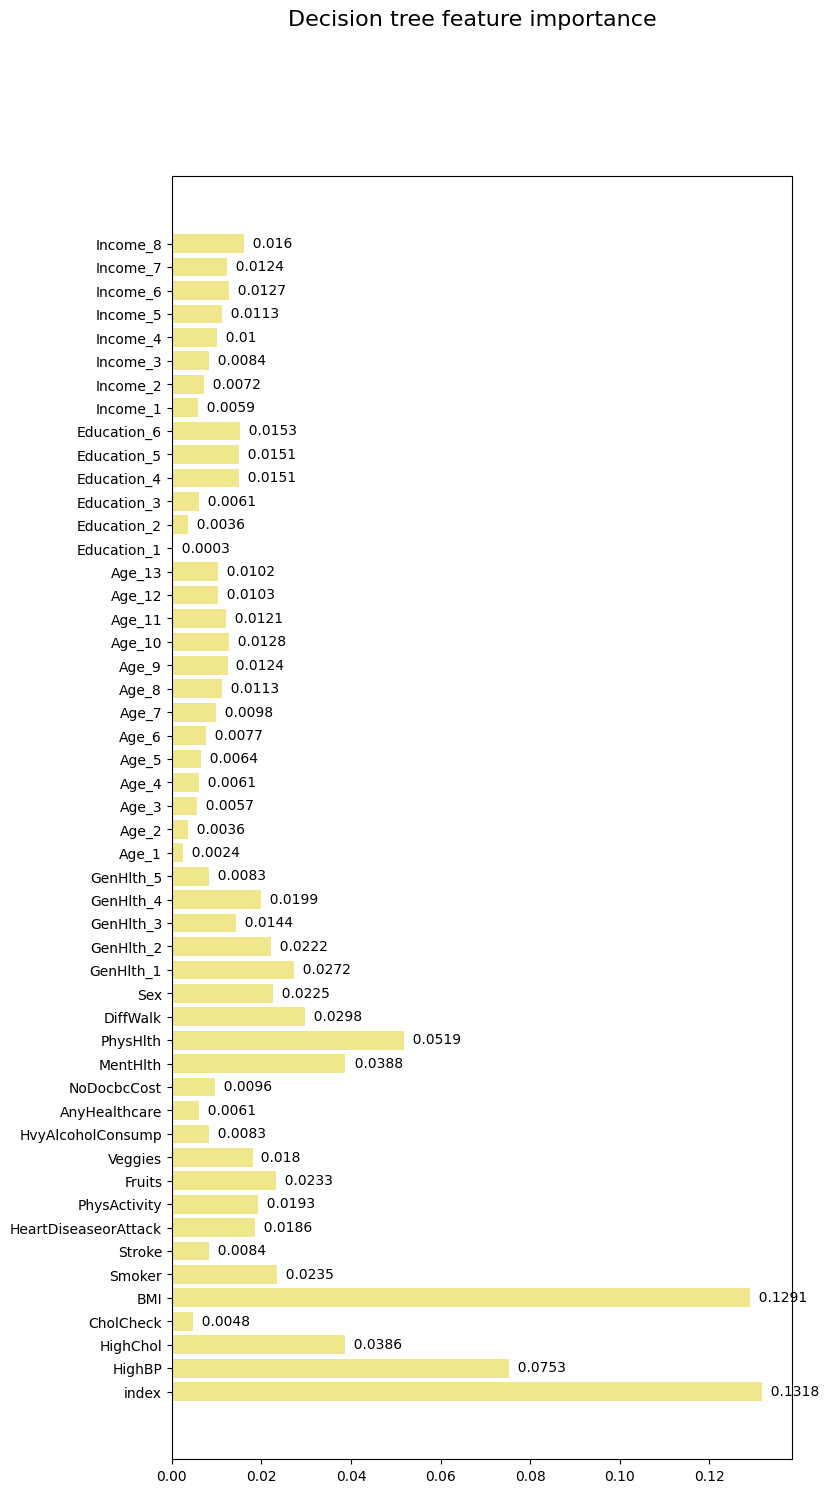

In [35]:
#Avaliação das variáveis de maior relevância no modelo de random forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
rf.predict(X_test)
decisionTreeSummary(rf,X_test.columns)

# Conclusão
A análise comparativa dos modelos de ML destaca o SVM como o mais eficaz na predição de diabetes mellitus, seguido de perto pelo Random Forest, Decision Tree e KNN. Esses modelos demonstram potencial para serem integrados em sistemas de suporte à decisão clínica, auxiliando no diagnóstico precoce e no manejo eficaz da doença.

Dificuldades encontradas: Devido ao grande volume de dados presentes na base, foi necessário realizar uma otimização significativa para garantir que o sistema operacional pudesse processar as informações de maneira eficiente.

Próximos passos:
- Realizar o treinamento com a base de dados completas e balanceando os dados com o class weight (pesos).
- Fazer a seleção das variáveis baseado na relevância avaliada
- Utilizar outros modelos para comparação
- Treinar com uma base de dados brasileira
